In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
# Load your dataset
data = pd.read_csv('Mall_Customers.csv')

In [13]:
# Preprocessing: Select relevant attributes and handle missing values if any
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = X.dropna()

In [14]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


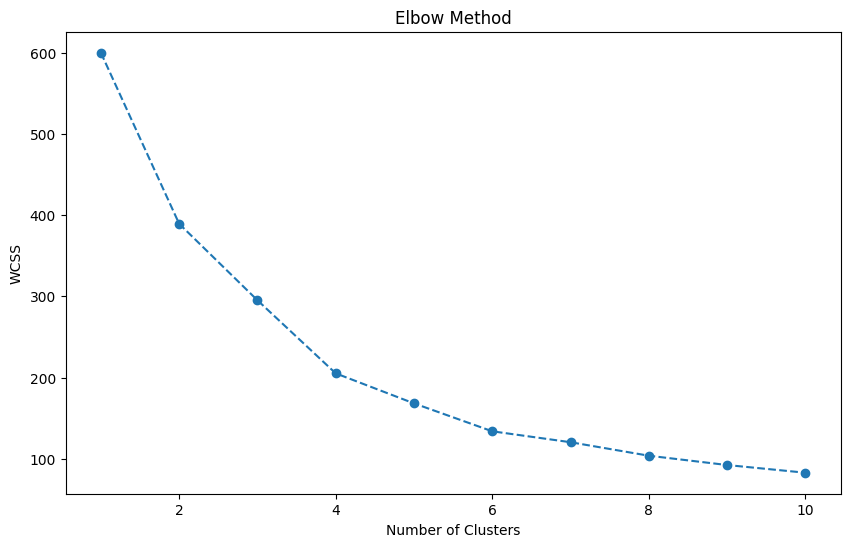

In [16]:

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


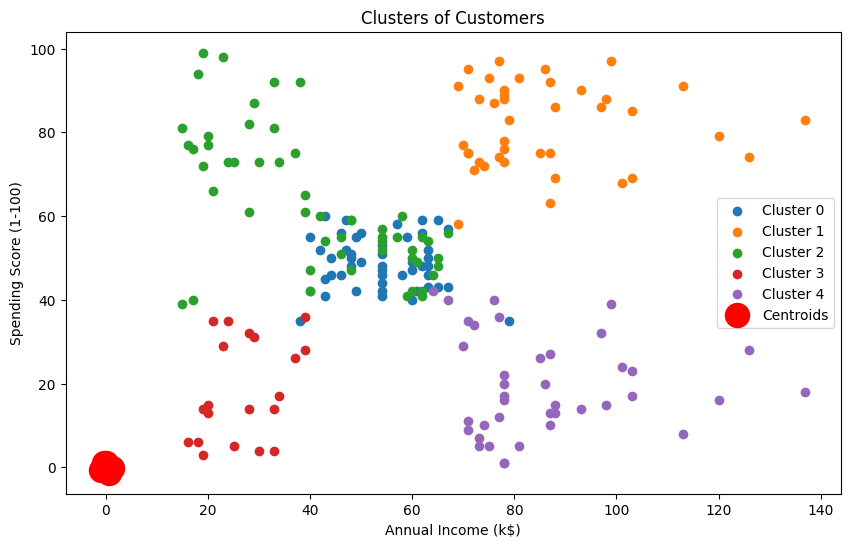

In [17]:
# Based on the Elbow method, choose the optimal number of clusters
# Let's say it's 5 in this case
n_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to each data point
data['Cluster'] = kmeans.labels_

# Visualize the clusters (in 2D)
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
